# Practical: 10 Decision Tree

<h3>Ishika Tailor 180280116118</h3>

**Algorithm: Decision Tree Classification**

**Dataset: Iris Flower**

One of the most important considerations when choosing a machine learning algorithm is how interpretable it is. The ability to explain how an algorithm makes predictions is useful to not only you, but also to potential stakeholders. A very interpretable machine learning algorithm is a decision tree which you can think of as a series of questions designed to assign a class or predict a continuous value depending on the task. The example image is a decision tree designed for classification.

![image](decisionTreeExample.png)

## 1) Import Libraries

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## 2) Load the Dataset
The Iris dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the iris dataset.

In [3]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 3) Splitting Data into Training and Test Sets

![images](trainTestSplit.png)
The colors in the image indicate which variable (X_train, X_test, Y_train, Y_test) the data from the dataframe df went to for a particular train test split (not necessarily the exact split of the code below).

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

Note, another benefit of Decision Trees is that **you don’t have to standardize your features** unlike other algorithms like logistic regression and K-Nearest Neighbors. 

## 4) Decision Tree

<b>Step 1:</b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [5]:
# This was already imported earlier in the notebook so commenting out
#from sklearn.tree import DecisionTreeClassifier

<b>Step 2:</b> Make an instance of the Model

This is a place where we can tune the hyperparameters of a model. The code below constrains the model to have at most a depth of 2. Tree depth is a measure of how many splits it makes before coming to a prediction.

![images](max_depth_not_depth.png)

In [6]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (features sepal width, sepal height etc) and y (labels-which species of iris)

In [7]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

<b>Step 4:</b> Predict the labels of new data (new flowers)

Uses the information the model learned during the model training process

In [8]:
# Predict for One Observation
clf.predict(X_test.iloc[0].values.reshape(1, -1))

array([2])

Predict for Multiple Observations at Once

In [9]:
clf.predict(X_test[0:10])

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

## 5) Measuring Model Performance

In [17]:
from sklearn import metrics
import seaborn as sns

In [10]:
score = clf.score(X_test, y_test)
print(score)

0.8947368421052632


In [14]:
print(metrics.classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.83      0.94      0.88        16
           2       0.86      0.67      0.75         9

    accuracy                           0.89        38
   macro avg       0.90      0.87      0.88        38
weighted avg       0.90      0.89      0.89        38



setosa flower accuracy is 1.0, versicolor precision is 0.83 ,virginica precision is 0.86. 

**Final accuracy is 89%**

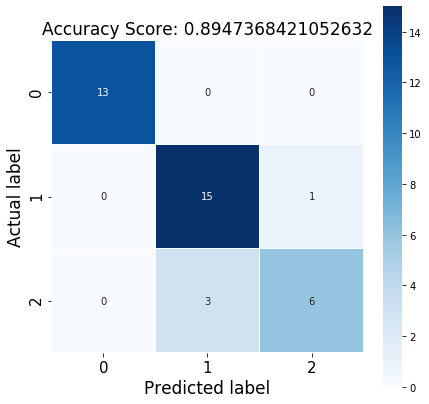

In [19]:
cm = metrics.confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

**Satosa: 13/13 flowers predicted successful.**


**Versicolor: 15/16 flowers predicted successful.**

**Virginica: 6/9 flowers predicted successful.**

## 6) Finding the Optimal `max_depth`

In [20]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))

# List to store the average RMSE for each value of max_depth:
accuracy = []

for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, y_train)

    score = clf.score(X_test, y_test)
    accuracy.append(score)

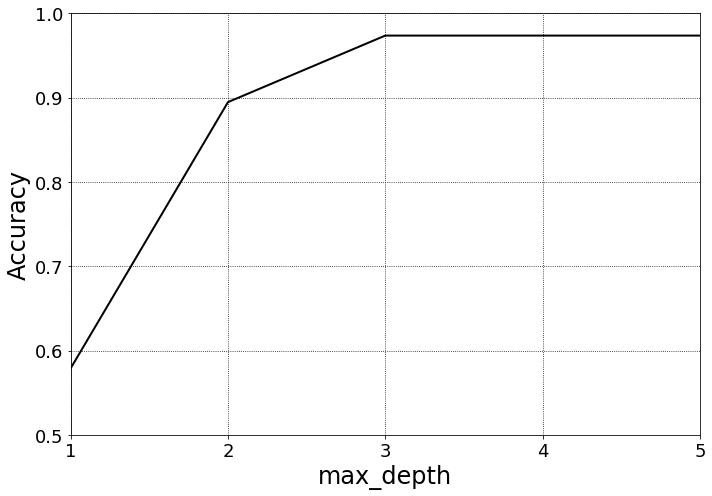

In [21]:
#ploting accuracy score depth wise
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.plot(max_depth_range,
        accuracy,
        lw=2,
        color='k')

ax.set_xlim([1, 5])
ax.set_ylim([.50, 1.00])
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')


ax.tick_params(labelsize = 18)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('Accuracy', fontsize = 24)
fig.tight_layout()
#fig.savefig('images/max_depth_vs_accuracy.png', dpi = 300)

# 7) Conclusion:

After Importing, Fit our dataset in our model, accuracy is 89.47%. 

We can clearly see model performance by confusion matrix and classification report.

By ploting above graph, optimal depth for model is 3.

Thank you! - Ishika tailor